Los datos bankData.csv corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable “y” ubicada en la última columna de la tabla) en función de un conjunto de 18 atributos descritos en el archivo Atributos.pdf. Cargue el conjunto de datos (bankData.csv) en este notebook y responda las preguntas.

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Aprendizaje Automático/tarea 2/data/bankData.csv') #actualizar con ruta propia

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('bankData.csv')

In [2]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [4]:
data.describe(include='all')

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## Valores faltantes

In [5]:
missing = data.isnull().sum()
missing.sort_values(ascending=False)

age               0
pdays             0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
campaign          0
education         0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
y                 0
dtype: int64

## Tipos de datos

In [6]:
data.dtypes

age                 int64
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Podemos observar:
- 8 variables categoricas
- 10 variables numércias

Para resolver este problema utilizamos un modelo de clasificación.

Convertimos la variable objetivo en factor.

### Conversion de variables categóricas a numércias


In [7]:
# Se identifica el nombre de las columnas numéricas y categóricas
# ------------------------------------------------------------------------------
cat_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns.to_list()

In [8]:
for v in cat_cols:
    data[v],_ = pd.factorize(data[v],sort=False)

In [9]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,487,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,0,1,0,1,0,0,346,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,0,0,1,1,1,227,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,0,0,2,1,1,1,0,17,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,0,0,0,2,2,58,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0


Para las siguientes preguntas, considere las siguientes particiones de los datos

In [10]:
#primera partición
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns = 'y'),data['y'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

## Pregunta 1
Usando `X_train2` (para entrenamiento) y `X_val` (para evaluación), explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste. Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

### Respuesta:

a) Explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste.

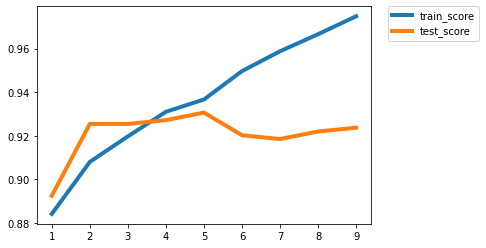

In [11]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_score = []
test_score = []

for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_score.append(tree.score(X_train2, y_train2))
    test_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_score, label="train_score", linewidth=4)
plt.plot(range(1,10), test_score, label="test_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

b) Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento X_train y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test. 

In [12]:
# Profunddiad encontrada 5
#-------------------------------------------------
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [13]:
from sklearn.metrics import accuracy_score
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas es: {100 * round(accuracy,2)} %")

El porcentaje de clasificaciones correctas es: 89.0 %


c) Grafique el árbol resultante. 


Profundidad del árbol: 5
Número de nodos terminales: 30


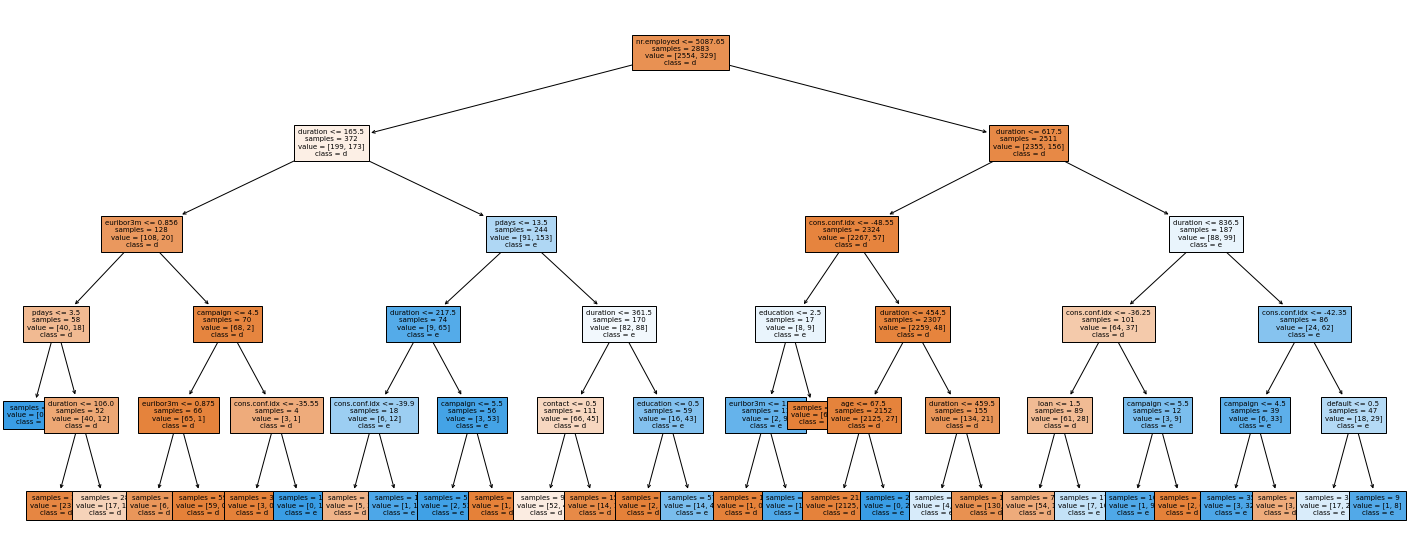

In [15]:
from sklearn.tree import plot_tree

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(25, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = 'y').columns.tolist(),
            class_names   = 'deposito_plazo',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

d) Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

Según la matriz de confusión, podemos decir que al clasificador le resulta más difícil clasificar a los clientes que **si van a tomar un depósito a plazo**, debido a que comete un error del 65%.

In [16]:
from sklearn.metrics import confusion_matrix
cf_m = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

In [17]:
print(f"Porc. de error para el NO: {round(cf_m[0,1]/cf_m[0].sum(),2)*100}%")
print(f"Porc. de error para el SI: {round(cf_m[1,0]/cf_m[1].sum(),2)*100}%")

Porc. de error para el NO: 5.0%
Porc. de error para el SI: 65.0%


## Pregunta 2
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta

In [18]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': data.drop(columns = 'y').columns,
                             'importancia': modelo.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,duration,0.468225
17,nr.employed,0.311258
15,cons.conf.idx,0.058589
10,pdays,0.058534
9,campaign,0.023989
1,education,0.021885
16,euribor3m,0.020015
5,contact,0.011776
0,age,0.011550
4,loan,0.009310


Cuál es el atributo más importante para este problema de clasificación?

**duration**

Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación?

In [19]:
vec = importancia_predictores.sort_values('importancia', ascending=False)
vec[vec['importancia']<=0]['predictor'].to_list()

['month',
 'day_of_week',
 'housing',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx']

In [36]:
# Los mejores predictores
#--------------------------------------------------
best_predictores = vec[vec['importancia']>0.01]['predictor'].to_list()

## Pregunta 3
Considere un clasificador Random Forest. Usando `X_train2` y `X_val` utilice una estrategia de búsqueda de hiperparámetros, para determinar el valor de `n_estimators` (cantidad de árboles) y `max_features` (la cantidad de características a considerar al buscar la mejor división o split) con tal que el model no sobreajuste. Luego, entrene un random forest (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?

### Respuesta

a) Considere un clasificador Random Forest. Usando X_train2 y X_val utilice una estrategia de búsqueda de hiperparámetros, para determinar el valor de n_estimators (cantidad de árboles) y max_features (la cantidad de características a considerar al buscar la mejor división o split) con tal que el model no sobreajuste.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

# ==============================================================================
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [50,100,150,200,300],
                 'max_features': [5, 7, 9, 12, 15, 18],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# ==============================================================================
# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:    
    modelo = RandomForestClassifier(oob_score=True,n_jobs= -1,random_state = 123,** params)    
    modelo.fit(X_train2, y_train2)    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    #print(f"Modelo: {params} \u2713")

# ==============================================================================
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
195,0.922376,entropy,10.0,12,50
179,0.921075,entropy,3.0,18,300
174,0.921075,entropy,3.0,15,300
171,0.920642,entropy,3.0,15,100


b)  Luego, entrene un random forest (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento X_train y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test.

In [21]:
# El mejor modelo
# ------------------------------------------------------------------------------
forest = RandomForestClassifier(n_estimators=50, max_features=12, max_depth=10, random_state=123)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
forest.fit(X_train, y_train) 

RandomForestClassifier(max_depth=10, max_features=12, n_estimators=50,
                       random_state=123)

In [22]:
# Prueba del modelo
# ------------------------------------------------------------------------------
predicciones = forest.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas es: {100 * round(accuracy,2)} %")

El porcentaje de clasificaciones correctas es: 90.0 %


c) Obtiene mejores resultados que el árbol de decisión de la pregunta 1?

Si, el porcentaje de accuracy es ligeramente mejor que le modelo de árbol. 

89% < 90%

## Pregunta 4
Siga la misma idea de la pregunta 3, pero ahora considere un SVM para clasificación, i.e., `SVC(kernel='rbf', C=A, gamma=B)`. En este caso la búsqueda de los hiperparámetros corresponde a encontrar valores apropiados para A y B. Luego, entrene un SVC (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Obtiene mejores resultados que el árbol de decisión de la pregunta 1?  

### Respuesta

a) hhora considere un SVM para clasificación, i.e., SVC(kernel='rbf', C=A, gamma=B).

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X_train2, y_train2)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1,0.001,rbf,0.894622,0.001905,0.952949,0.001102
3,10,0.001,rbf,0.888119,0.004602,0.978534,0.002321
2,1,0.1,rbf,0.884215,0.000071,0.998916,0.000307
5,10,0.1,rbf,0.883781,0.000685,1.000000,0.000000
8,100,0.1,rbf,0.883781,0.000685,1.000000,0.000000


In [26]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_SVC = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} : 0.8946215548692386 accuracy


b) Luego, entrene un SVC (con los hiperparámetros determinados previamente) usando el conjunto de entrenamiento X_train y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test.

In [30]:
# Reentrenar con X_train
# ==============================================================================
modelo_SVC.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = modelo_SVC.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: {100*round(accuracy,2)}%")


El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: 89.0%


## Pregunta 5 
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`.

### Respuesta

In [32]:
from sklearn.naive_bayes import GaussianNB

modelo_GNB = GaussianNB()

# Entrenar
# ==============================================================================
modelo_GNB.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = modelo_GNB.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: {100*round(accuracy,2)}%")


El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: 84.0%


## Pregunta 6
Entrene un naive Bayes usando el conjunto de entrenamiento `X_train`, pero sólo utilizando los atributos que aparecen en el árbol obtenido en la pregunta 1. Entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. ¿Mejora el desempeño al comparar con lo obtenido en la pregunta 5?

### Respuesta

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns = 'y')[best_predictores],data['y'],
    test_size=0.3, random_state=0)


In [38]:
# Entrenar
# ==============================================================================
modelo_GNB.fit(X_train,y_train)

# Predicciones test
# ==============================================================================
predicciones = modelo_GNB.predict(X_test)

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: {100*round(accuracy,2)}%")


El porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba X_test: 88.0%


## Suerte!